In [145]:
!pip install pandas numpy scikit-learn matplotlib

In [146]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [147]:
file_path = '50lux.csv'  # Ganti dengan path file EEG Anda
eeg_data = pd.read_csv(file_path) # Sesuaikan nama sheet jika diperlukan
eeg_data.columns

Index(['Unnamed: 0', 'Date', 'Duration', 'Tag', 'Attention', 'Relaxation',
       'Delta', 'Theta', 'Low-Alpha', 'High-Alpha', 'Low-Beta', 'High-Beta',
       'Low-Gamma', 'Mid-Gamma', 'SyncRate', 'Time-set'],
      dtype='object')

In [148]:
# Drop 'Unnamed: 0' column
eeg_data.drop('Unnamed: 0', axis=1, inplace=True)

In [149]:
eeg_data.head()

,Date,Duration,Tag,Attention,Relaxation,Delta,Theta,Low-Alpha,High-Alpha,Low-Beta,High-Beta,Low-Gamma,Mid-Gamma,SyncRate,Time-set
0,2024-06-07 16:25:27,727.0,Test,63,34,103412,9965,1269,614,1516,2935,1957,1587,0,1
1,2024-06-07 16:25:27,727.0,Test,67,23,367906,77978,8389,13614,6928,5254,3581,982,0,2
2,2024-06-07 16:25:27,727.0,Test,67,17,23018,30583,3696,11113,6253,11873,2852,1642,0,3
3,2024-06-07 16:25:27,727.0,Test,91,51,27415,23517,8780,14857,2594,4230,4457,2137,0,4
4,2024-06-07 16:25:27,727.0,Test,84,69,27760,22435,8865,9686,5708,6365,2740,2472,0,5


In [150]:
eeg_columns = ['Delta', 'Theta', 'Low-Alpha', 'High-Alpha', 'Low-Beta', 'High-Beta', 'Low-Gamma', 'Mid-Gamma']

In [151]:
# for col in eeg_data.columns:
#     eeg_values=eeg_data[eeg_columns].values
#     eeg_values

eeg_values = eeg_data[eeg_columns].values

In [152]:
scaler = StandardScaler()
eeg_values_scaled = scaler.fit_transform(eeg_values)

In [153]:
pca = PCA(n_components=0.95)  # Pilih komponen yang menjelaskan 95% variansi
eeg_pca = pca.fit_transform(eeg_values_scaled)

In [154]:
corrected_eeg_columns = [f'PCA_{i+1}_{eeg_columns[i],}' for i in range(eeg_pca.shape[1])]

In [155]:
pca_df = pd.DataFrame(eeg_pca, columns=corrected_eeg_columns)
pca_df.head()

,"PCA_1_('Delta',)","PCA_2_('Theta',)","PCA_3_('Low-Alpha',)","PCA_4_('High-Alpha',)","PCA_5_('Low-Beta',)","PCA_6_('High-Beta',)","PCA_7_('Low-Gamma',)"
0,-1.244162,-0.071100,0.371274,0.149512,0.011709,-0.118151,-0.019088
1,0.213092,-1.070917,0.585186,-0.313027,-0.430715,-0.022241,0.076325
2,-0.433555,0.008035,-0.199438,-0.290748,-0.404198,0.167957,0.073184
3,-0.493409,-0.211719,-0.201680,-0.492419,-0.028660,0.083839,0.630820
4,-0.504138,-0.100547,-0.259941,-0.173784,-0.016691,-0.026256,0.195428


In [156]:
# Dropping column for combine into new pca dataset
eeg_data.drop(['Delta', 'Theta', 'Low-Alpha', 'High-Alpha', 'Low-Beta', 'High-Beta', 'Low-Gamma', 'Mid-Gamma'], axis=1, inplace=True)

In [157]:
# Combine the original DataFrame with the PCA DataFrame
combined_df = pd.concat([eeg_data.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

In [158]:
# Make CSV_file
output_file = 'combined_pca_50lux.csv' # Change this into your own filename
combined_df.to_csv(output_file, index=False)

In [159]:
explained_variance_ratio = pca.explained_variance_ratio_

In [160]:
cumulative_variance = np.cumsum(explained_variance_ratio)

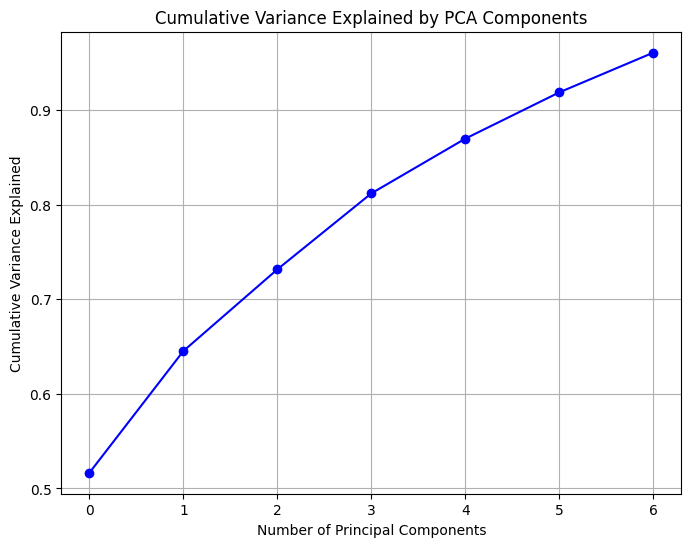

In [161]:
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', color='b')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [162]:
explained_variance = pca.explained_variance_

In [163]:
print(f'Jumlah komponen utama yang dipilih: {pca.n_components_}')
print(f'Varians yang dijelaskan oleh tiap komponen utama: {explained_variance}')

Jumlah komponen utama yang dipilih: 7
Varians yang dijelaskan oleh tiap komponen utama: [4.1335949  1.02919305 0.69029936 0.64227859 0.46275631 0.39131408
 0.33573631]


In [164]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Persentase varians yang dijelaskan oleh tiap komponen utama: {explained_variance_ratio}')

Persentase varians yang dijelaskan oleh tiap komponen utama: [0.51665409 0.12863786 0.08627986 0.08027779 0.05783947 0.04890997
 0.04196336]
